In [87]:
# !pip install opensmile
# try:
#     from importlib import metadata
# except ImportError:
#     # Running on pre-3.8 Python; use importlib-metadata package
#     import importlib_metadata as metadata  # type: ignore
# import opensmile

In [1]:
data_dir='./data/voice/processed/'
import os
from scipy.io.wavfile import read
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from PIL import Image
import scipy.misc
import cv2
import librosa
from tqdm import tqdm
import numpy as np
import librosa
import librosa.display
import os
import glob
import scipy
import matplotlib.pyplot as plt
import librosa
import IPython
import cv2
from IPython.display import Audio
import soundfile as sf
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
cmap = plt.get_cmap('inferno')
import python_speech_features as mfcc


C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
clean_data = np.load('clean_data.npy',allow_pickle=True)
clean_labels = np.load('clean_labels.npy')
noise_added = np.load('noise_added.npy')
clean_pad = np.load('clean_pad.npy')
denoised = np.load('denoised_audio.npy')

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
output_matrix = to_categorical(clean_labels, num_classes = 4)
data = './selected_feature.csv'
seed = 9
np.random.seed(seed)

# load pima indians dataset
dataset =  pd.read_csv(data)
dataset = dataset.drop(['Unnamed: 0'],axis=1)

(X_train, X_test, y_train, y_test) = train_test_split(dataset, output_matrix, test_size=0.2, random_state=seed,shuffle=True)
# X_train=X_train.values
# y_train=y_train.values
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1648, 143) (412, 143) (1648, 4) (412, 4)


In [4]:
tf.keras.backend.clear_session()
cl_model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(5000,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1750, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1250, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(750, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(325, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
cl_model.summary()
old =0
STD_acc = []
STD_loss=[]
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            STD_acc.append(logs.get('val_acc'))
            STD_loss.append(logs.get('val_loss'))
            if(logs.get('val_acc') > old):
#                 cl_model.save('std_new_mfcc_model.h5',overwrite=True)
                old = logs.get('val_acc')
                print('Epoch=',epoch,"acc = ",round(old,4))#sensitivity',
#                       round(logs.get('val_sensitivity_at_specificity'),4),'specificity=',
#                       round(logs.get('val_specificity_at_sensitivity'),4),'precision=',round(logs.get('val_precision'),4))
                
saver =myCallback()
cl_model.summary()
cl_model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])#,
#                                                                               tf.keras.metrics.SensitivityAtSpecificity(0.5),
#                                                                               tf.keras.metrics.SpecificityAtSensitivity(0.5),
#                                                                              tf.keras.metrics.Precision()])
history = cl_model.fit(x=X_train,y=y_train,
                              epochs=5000,
                              verbose=0,
                              batch_size=8192,
                              validation_data=(X_test,y_test),callbacks=[saver])
import pandas
F_df = pd.DataFrame({'accuracy':STD_acc,"loss":STD_loss})
F_df.to_csv("track_curve_MLP.csv")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 143)               572       
_________________________________________________________________
dense (Dense)                (None, 5000)              720000    
_________________________________________________________________
dropout (Dropout)            (None, 5000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3500)              17503500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 3500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2500)              8752500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2500)              0

In [5]:
tf.keras.backend.clear_session()
cl_model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(5000,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1750, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1250, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(750, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(325, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
cl_model.summary()
old =0
STD_acc = []
STD_loss=[]
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            STD_acc.append(logs.get('acc'))
            STD_loss.append(logs.get('loss'))
            if(logs.get('val_acc') > old):
#                 cl_model.save('std_new_mfcc_model.h5',overwrite=True)
                old = logs.get('val_acc')
                print('Epoch=',epoch,"acc = ",round(old,4))#sensitivity',
#                       round(logs.get('val_sensitivity_at_specificity'),4),'specificity=',
#                       round(logs.get('val_specificity_at_sensitivity'),4),'precision=',round(logs.get('val_precision'),4))
                
saver =myCallback()
cl_model.summary()
cl_model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])#,
#                                                                               tf.keras.metrics.SensitivityAtSpecificity(0.5),
#                                                                               tf.keras.metrics.SpecificityAtSensitivity(0.5),
#                                                                              tf.keras.metrics.Precision()])
history = cl_model.fit(x=X_train,y=y_train,
                              epochs=5000,
                              verbose=0,
                              batch_size=8192,
                              validation_data=(X_test,y_test),callbacks=[saver])
import pandas
F_df = pd.DataFrame({'accuracy':STD_acc,"loss":STD_loss})
F_df.to_csv("track_curve_MLP-train.csv")

                        precision    recall  f1-score   support

               healthy       0.98      0.93      0.95       121
hyperkinetic dysphonia       0.92      0.98      0.95       129
 hypokinetic dysphonia       0.93      0.92      0.93        77
     reflux laryngitis       0.96      0.96      0.96        85

              accuracy                           0.95       412
             macro avg       0.95      0.95      0.95       412
          weighted avg       0.95      0.95      0.95       412

[[112   6   1   2]
 [  1 126   2   0]
 [  0   5  71   1]
 [  1   0   2  82]]


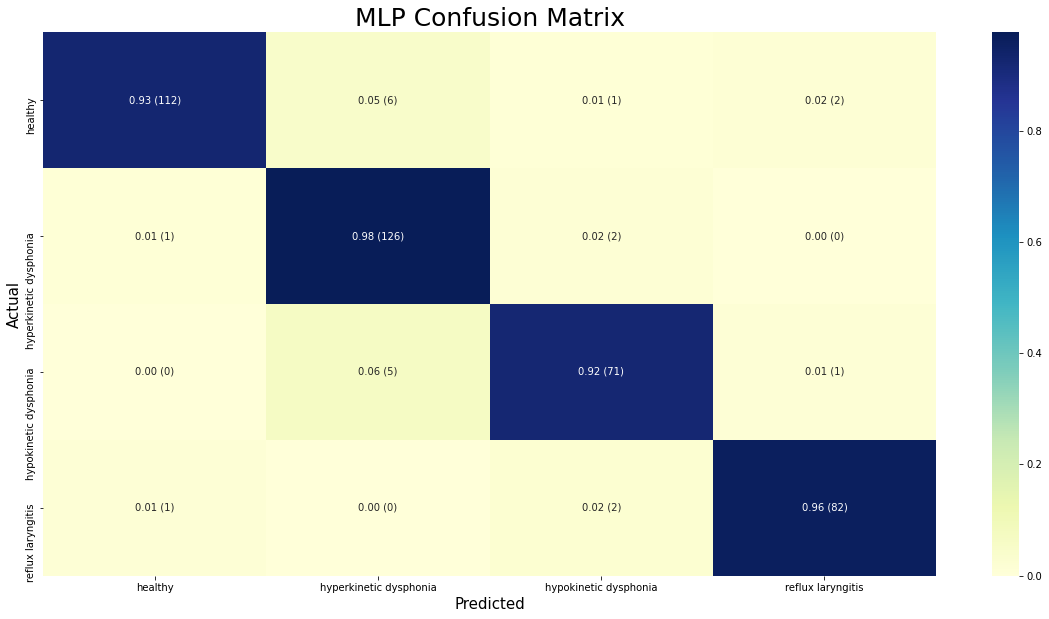

In [8]:
y_pred = cl_model.predict(X_test)

target_names = ['healthy', 'hyperkinetic dysphonia', 'hypokinetic dysphonia','reflux laryngitis']
import sklearn
import seaborn as sns
# from s
print(sklearn.metrics.classification_report(np.argmax(y_test,axis =-1), np.argmax(y_pred,axis =-1), labels=[0,1,2,3], target_names=target_names))
print(sklearn.metrics.confusion_matrix(np.argmax(y_test,axis =-1), np.argmax(y_pred,axis =-1), labels=[0,1,2,3]))


def plot_conf_mat(Ground_Truth_Labels, Predictions):
  confusion_matrix_raw = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize=None)
  confusion_matrix_norm = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize='true')
  shape = confusion_matrix_raw.shape
  data = np.asarray(confusion_matrix_raw, dtype=int)
  text = np.asarray(confusion_matrix_norm, dtype=float)
  annots = (np.asarray(["{0:.2f} ({1:.0f})".format(text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(shape[0],shape[1])
  fig = plt.figure(figsize=(20, 10))
  sns.heatmap(confusion_matrix_norm, cmap='YlGnBu', annot=annots, fmt='', xticklabels=target_names, yticklabels=target_names)
  plt.title('MLP Confusion Matrix', fontsize=25)
  plt.xlabel("Predicted", fontsize=15)
  plt.ylabel("Actual", fontsize=15)
  plt.savefig('./IMG/jpg/MLP_CM.png',bbox_inches='tight',dpi=200)
  plt.savefig('./IMG/eps/MLP_CM.eps',bbox_inches='tight',dpi=200)
#
plot_conf_mat(np.argmax(y_test,axis =-1), np.argmax(y_pred,axis =-1))

In [74]:
gradients=[]
def my_CE(y_true, y_pred):
    smoothing =0.01
    log_y_pred = tf.math.log(y_pred+smoothing) 
    element_wise = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
    return tf.reduce_mean(tf.reduce_sum(element_wise,axis=1))

for samp,expected_output in tqdm(zip(dataset.values,output_matrix)):
    with tf.GradientTape() as tape:
        # cast image to float
        inputs = tf.cast(np.reshape(samp,(1,143)),dtype='float32')

        # watch the input pixels
        tape.watch(inputs)

        # generate the predictions
        predictions = cl_model(inputs)

        # get the loss
#         print(expected_output, np.reshape(predictions,(1,4))[0])
#         loss = tf.keras.losses.categorical_crossentropy(
#             expected_output, predictions[0]
#         )

        loss =my_CE(expected_output,predictions) 
#         print(expected_output, predictions[0],loss)

    # get the gradient with respect to the inputs
    # K.gradients(K.mean(model.layers[-2].output[0, :], axis=-1), model.layers[-5].layers[-2].output)[0]
    gradients.append(tape.gradient(loss, inputs)[0])

2060it [00:20, 100.90it/s]


In [80]:
# red_grad = tf.reduce_sum(gradients)
# red_grad
# np.array(gradients).shape
red_grad = np.mean(gradients,axis=0)
red_grad.shape
# red_grad
# gradients
from collections import defaultdict
dic = defaultdict(list)
for i,e in zip(gradients,clean_labels):
    dic[e].append(i)
    


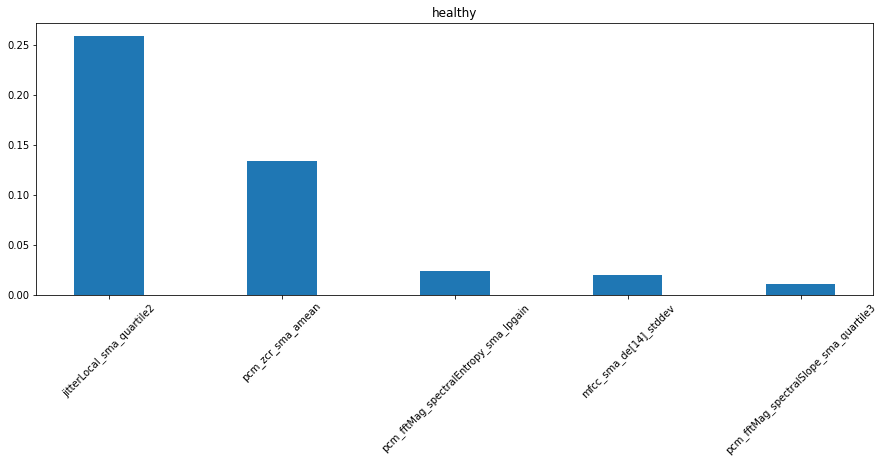

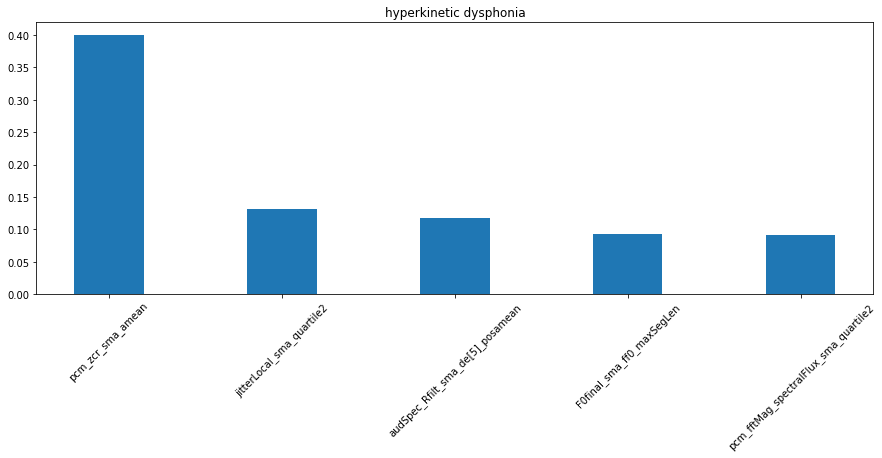

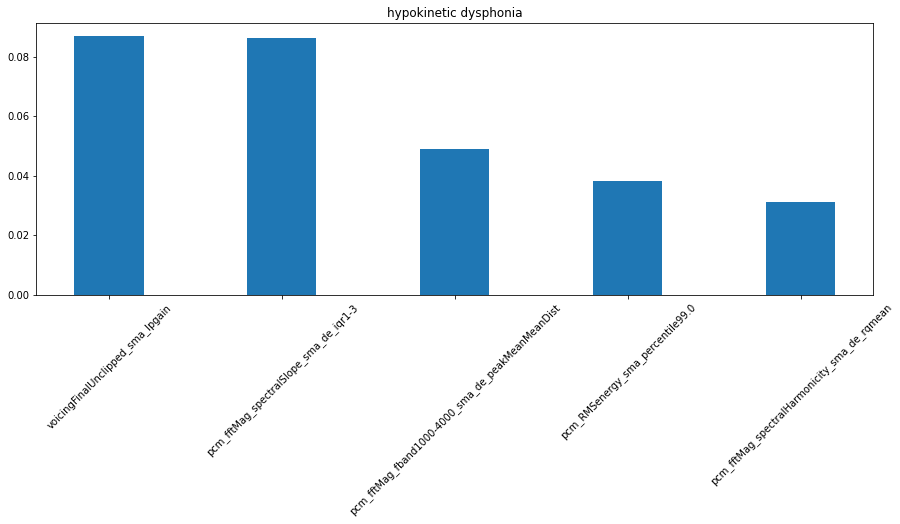

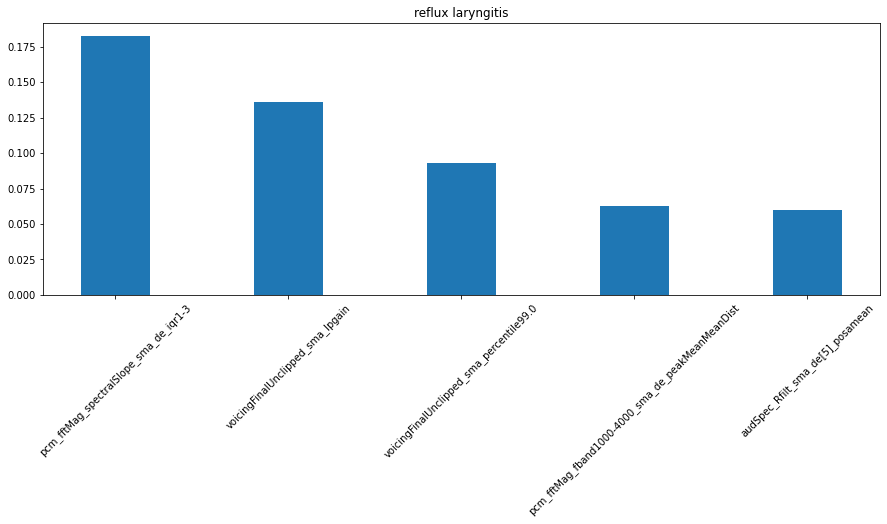

In [134]:
import operator

for i in dic.keys():
    plt.figure(figsize=(15,5))
        
    class_red = np.mean(dic[i],axis=0)
    class_red = class_red
    x = []
    y = []
    k = 5
    for h,j in enumerate(class_red):
        if j>0.01:
            x.append(dataset.columns[h])
            y.append(j)
    
#     plt.bar([k for k in range(1,144)],class_red)
    arr = sorted(zip(x,y),key=operator.itemgetter(1),reverse=True)
#     print(arr)
    x = [arr[i][0] for i in range(len(arr))]
    y = [arr[i][1] for i in range(len(arr))]
#     print(x,y)
    plt.bar(x[:k],y[:k],align='center', width=0.4)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylim(0)
    plt.title(target_names[i])
    plt.show()

In [129]:

list(map(arr))

TypeError: map() must have at least two arguments.

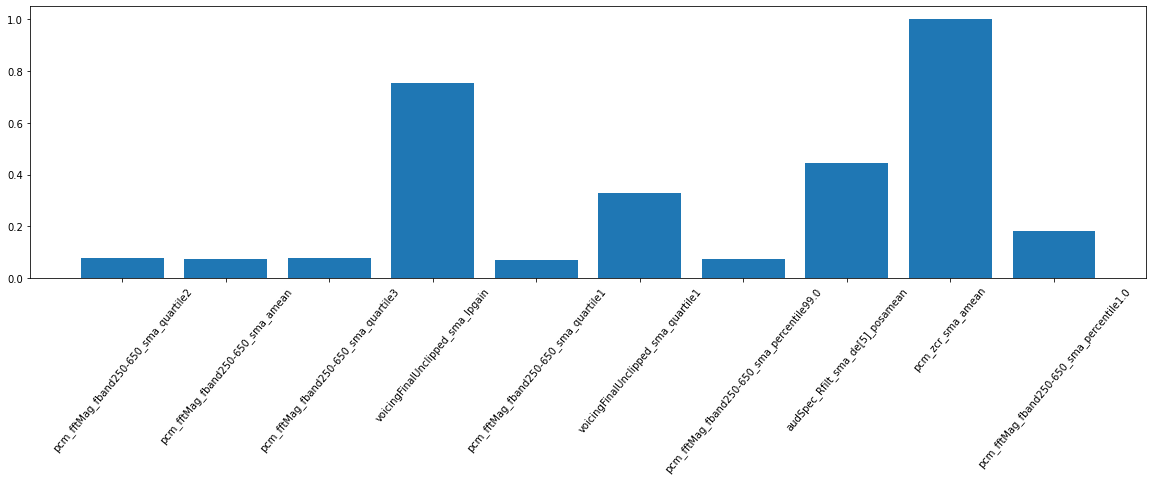

In [76]:
plt.figure(figsize=(20,5))
k=0
norm = gradients[k]/np.max(gradients[k])
x = []
y = []
for h,i in enumerate(norm):
    if i>0.05:
        x.append(dataset.columns[h])
        y.append(i)

plt.bar(x,y)
plt.ylim(0)
plt.xticks(rotation=50, fontsize=10)
plt.show()
# plt.xticks(ticks=[dataset.columns[i] if gradients[0][i-1]>0.2 else   for i in range(1,144)])

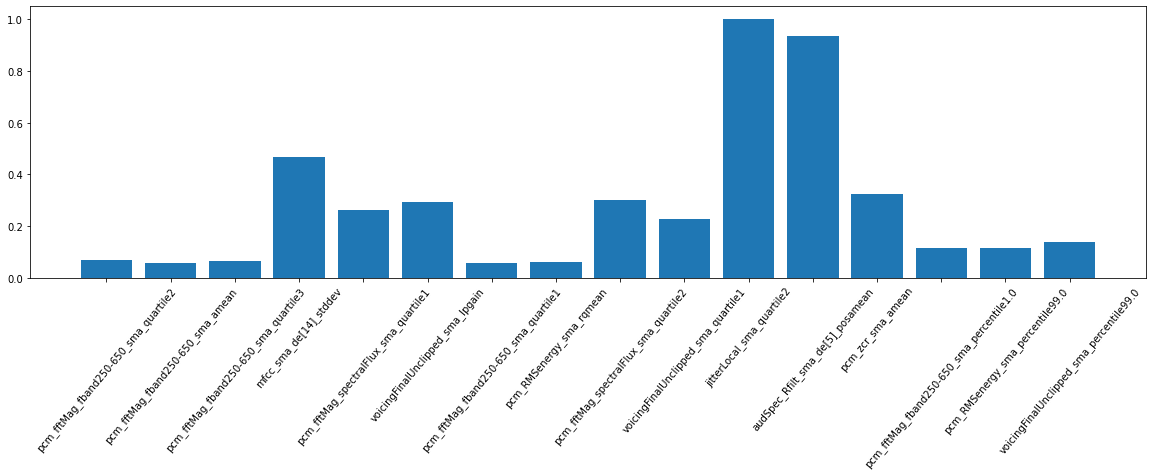

In [45]:
plt.figure(figsize=(20,5))
k=1
norm = gradients[k]/np.max(gradients[k])
x = []
y = []
for h,i in enumerate(norm):
    if i>0.05:
        x.append(dataset.columns[h])
        y.append(i)

plt.bar(x,y)
plt.ylim(0)
plt.xticks(rotation=50, fontsize=10)
plt.show()
# plt.xticks(ticks=[dataset.columns[i] if gradients[0][i-1]>0.2 else   for i in range(1,144)])